In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

###para que identifique  Opera, cambie el encabezado
response = requests.get(url, headers ={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36 OPR/120.0.0.0"
})


response

<Response [200]>

In [3]:
bs = BeautifulSoup(response.content, "html.parser")
bs

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conten

In [4]:
tabla = bs.find('table', class_="wikitable sortable plainrowheaders")
tabla

<table class="wikitable sortable plainrowheaders">
<tbody><tr>
<th>Rank
</th>
<th>Song
</th>
<th>Artist(s)
</th>
<th>Streams<br/>(billions)
</th>
<th>Release date
</th>
<th class="unsortable"><abbr title="References">Ref.</abbr>
</th></tr>
<tr>
<td style="text-align:center;">1
</td>
<th scope="row">"<a href="/wiki/Blinding_Lights" title="Blinding Lights">Blinding Lights</a>"
</th>
<td style="text-align:left;"><a href="/wiki/The_Weeknd" title="The Weeknd">The Weeknd</a></td>
<td style="text-align:center;">5.183</td>
<td style="text-align:right;"><span data-sort-value="000000002019-11-29-0000" style="white-space:nowrap">29 November 2019</span></td>
<td style="text-align:center;"><sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
</td></tr>
<tr>
<td style="text-align:center;">2
</td>
<th scope="row">"<a href="/wiki/Shape_of_You" title="Shape of You">Shape of You</a>"
</th>
<td style="text-align:le

In [5]:
encabezados=[]
for th in tabla.find_all('th')[0:5]:
    encabezados.append(th.get_text().strip())

In [6]:
encabezados

['Rank', 'Song', 'Artist(s)', 'Streams(billions)', 'Release date']

In [29]:
filas=[]
for tr in tabla.find_all('tr')[0:101]:
    filas.append(tr.get_text().strip())



In [30]:
filas


['Rank\n\nSong\n\nArtist(s)\n\nStreams(billions)\n\nRelease date\n\nRef.',
 '1\n\n"Blinding Lights"\n\nThe Weeknd\n5.183\n29 November 2019\n[1]',
 '2\n\n"Shape of You"\n\nEd Sheeran\n4.683\n6 January 2017\n[2]',
 '3\n\n"Starboy"\n\nThe Weeknd and Daft Punk\n4.255\n21 September 2016\n[3]',
 '4\n\n"Sweater Weather"\n\nThe Neighbourhood\n4.245\n3 December 2012\n[4]',
 '5\n\n"Someone You Loved"\n\nLewis Capaldi\n4.162\n8 November 2018\n[5]',
 '6\n\n"As It Was"\n\nHarry Styles\n4.155\n1 April 2022\n[6]',
 '7\n\n"Sunflower"\n\nPost Malone and Swae Lee\n4.054\n18 October 2018\n[7]',
 '8\n\n"One Dance"\n\nDrake with Wizkid and Kyla\n3.921\n5 April 2016\n[8]',
 '9\n\n"Perfect"\n\nEd Sheeran\n3.750\n3 March 2017\n[9]',
 '10\n\n"Stay"\n\nThe Kid Laroi and Justin Bieber\n3.746\n9 July 2021\n[10]',
 '11\n\n"Believer"\n\nImagine Dragons\n3.680\n1 February 2017\n[11]',
 '12\n\n"Heat Waves"\n\nGlass Animals\n3.604\n29 June 2020\n[12]',
 '13\n\n"Lovely"\n\nBillie Eilish and Khalid\n3.576\n19 April 2018

In [31]:
import pandas as pd

# lista
data = filas

# separar cada string en filas
rows = []
for row in data:
    parts = []
    for item in row.split("\n\n"):
        parts.extend(item.split("\n"))
    parts = [x.strip() for x in parts if x.strip()]
    rows.append(parts)

# la primera fila son los encabezados
columns = rows[0]

# las demás filas son los registros
records = rows[1:]

# normalizar filas (rellenar con None si faltan columnas)
normalized = []
for rec in records:
    if len(rec) < len(columns):
        rec += [None] * (len(columns) - len(rec))
    normalized.append(rec)

# crear DataFrame
df = pd.DataFrame(normalized, columns=columns)

# me estaba mandando un corte por eso pongo esta linea
pd.set_option("display.expand_frame_repr", False)

print(df.head())

  Rank                 Song                 Artist(s) Streams(billions)       Release date Ref.
0    1    "Blinding Lights"                The Weeknd             5.183   29 November 2019  [1]
1    2       "Shape of You"                Ed Sheeran             4.683     6 January 2017  [2]
2    3            "Starboy"  The Weeknd and Daft Punk             4.255  21 September 2016  [3]
3    4    "Sweater Weather"         The Neighbourhood             4.245    3 December 2012  [4]
4    5  "Someone You Loved"             Lewis Capaldi             4.162    8 November 2018  [5]


In [32]:
df = df.drop(columns=["Ref."])

print(df.head())



  Rank                 Song                 Artist(s) Streams(billions)       Release date
0    1    "Blinding Lights"                The Weeknd             5.183   29 November 2019
1    2       "Shape of You"                Ed Sheeran             4.683     6 January 2017
2    3            "Starboy"  The Weeknd and Daft Punk             4.255  21 September 2016
3    4    "Sweater Weather"         The Neighbourhood             4.245    3 December 2012
4    5  "Someone You Loved"             Lewis Capaldi             4.162    8 November 2018


# Cargar la informacion a SQL



In [33]:
import sqlite3
import os
os.makedirs("../data", exist_ok=True)
conn = sqlite3.connect("../data/web_db.db")

In [34]:
conn = sqlite3.connect('spotify_records.db')
cursor = conn.cursor()

In [13]:
df.to_sql("spotify_records", conn, if_exists="replace", index=False)
cursor = conn.cursor()

In [36]:
pd.read_sql_query("SELECT * FROM spotify_records", conn)

,Rank,Song,Artist(s),Streams(billions),Release date
0,1,"""Blinding Lights""",The Weeknd,5.182,29 November 2019
1,2,"""Shape of You""",Ed Sheeran,4.682,6 January 2017
2,97,"""Someone Like You""",Adele,2.477,24 January 2011
3,98,"""Payphone""",Maroon 5 and Wiz Khalifa,2.475,16 April 2012


# Visualizacion:

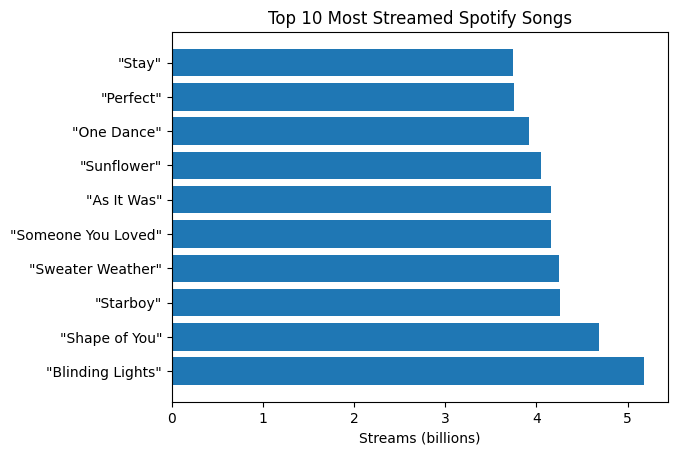

In [39]:
import matplotlib.pyplot as plt
import pandas as pd


df["Streams(billions)"] = pd.to_numeric(df["Streams(billions)"], errors="coerce")


top10 = df.nlargest(10, "Streams(billions)")


plt.barh(top10["Song"], top10["Streams(billions)"])
plt.xlabel("Streams (billions)")
plt.title("Top 10 Most Streamed Spotify Songs")
plt.gca().axis() 
plt.show()



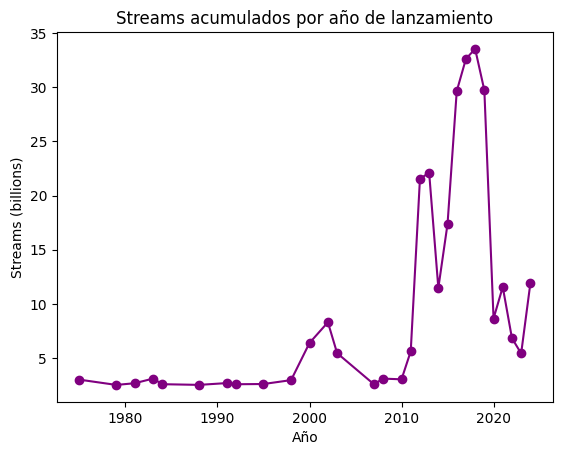

In [42]:

df["Release date"] = pd.to_datetime(df["Release date"], errors="coerce")
df["Year"] = df["Release date"].dt.year

# streams por año
yearly = df.groupby("Year")["Streams(billions)"].sum()

yearly.plot(kind="line", marker="o", color="purple")
plt.title("Streams acumulados por año de lanzamiento")
plt.ylabel("Streams (billions)")
plt.xlabel("Año")
plt.show()




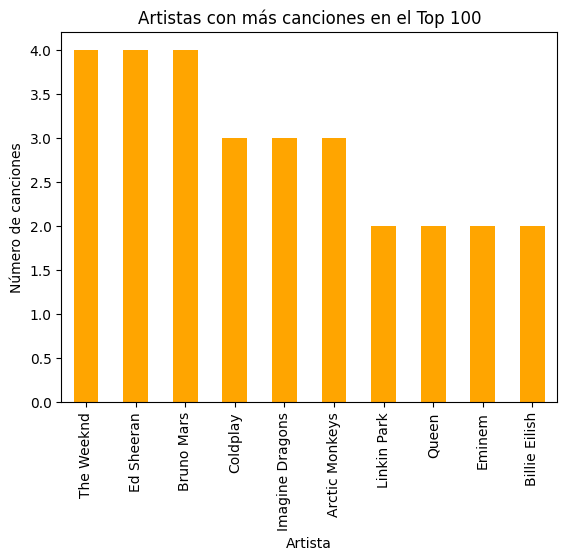

In [43]:
artist_counts = df["Artist(s)"].value_counts().nlargest(10)

artist_counts.plot(kind="bar", color="orange")
plt.title("Artistas con más canciones en el Top 100")
plt.ylabel("Número de canciones")
plt.xlabel("Artista")
plt.show()

